# 数字识别的简单尝试
参考自[A Beginner Approach to Classification](https://www.kaggle.com/archaeocharlie/a-beginner-s-approach-to-classification)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
import os
path=r"F:\Diverse\statistics\Python_data_analysis\Kaggle项目\20170926_MNIST\dataset"
os.chdir(path)

%matplotlib inline

In [11]:
labeled_images=pd.read_csv("train.csv")
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,0]
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

### 1.View Images

In [44]:
def show_image(i):
    img = train_images.iloc[i].as_matrix()
    img = img.reshape((28,28))
    plt.imshow(img, cmap="gray")
    plt.title(train_labels.iloc[i])

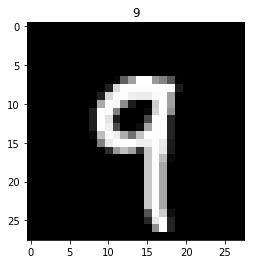

In [46]:
show_image(10)

### 2.Examining the Pixel Values

(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

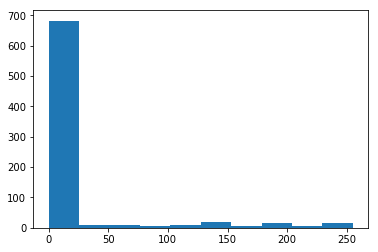

In [47]:
plt.hist(train_images.iloc[1])

### 3.training model

In [48]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.10000000000000001

In [49]:
### 4.Imporving model

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\pandas\core\frame.py:2464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fr

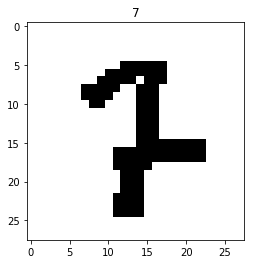

In [51]:
test_images[test_images>0] = 1
train_images[train_images>0] = 1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img, cmap="binary")
plt.title(train_labels.iloc[i])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

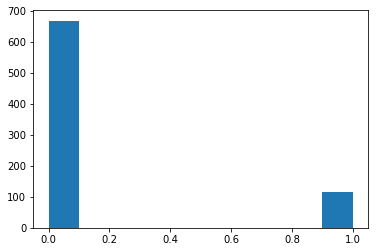

In [52]:
plt.hist(train_images.iloc[1])

### 5.retraning model

In [53]:
clf=svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.88700000000000001

### 6.Labelling the test data

In [54]:
test_data=pd.read_csv("test.csv")
test_data[test_data > 0] = 1 
results=clf.predict(test_data[0:5000])

In [56]:
df = pd.DataFrame(results)
df.index.name="ImageId"
df.index += 1
df.columns = ["Label"]
df.to_csv("results.csv",header=True)